In [1]:
import pandas as pd
import numpy as np

## Fair dirichlet prior
The line below toggles dirichlet to true and false. If you want to disable smoothing, turn dirichlet value to *false*.

In [2]:
dirichlet = True

## The input data
If you want to apply the test with another dataset, change the below lines.

In [3]:
training_data = pd.read_csv(r'bbcsports_train.csv')
validation_data = pd.read_csv(r'bbcsports_val.csv')
# You may uncomment the line below and comment the line above to test with different data
#validation_data = pd.read_csv(r'bbcsports_test.csv') 

# Training

In [4]:
def predict_value(argument):
    max_result = label_probabilities[0]
    for j in range(4613):
        max_result += argument[j] * word_probabilities.iloc[0][j]
    class_id = 0
    for k in range(1, 5):
        result = label_probabilities[k]
        for j in range(4613):
            result += argument[j] * word_probabilities.iloc[k][j]
        if result > max_result:
            max_result = result
            class_id = k
    return class_id

$P(Dear|y_i)$

class_label
0     77
1     86
2    198
3    114
4     77
dtype: int64

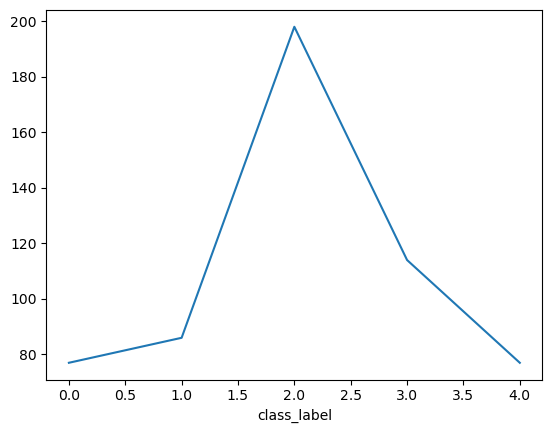

In [5]:
label_document_count = training_data.groupby(['class_label']).size()
label_document_count.plot()
label_count = int(label_document_count.count())
display(label_document_count)

class_label
0    24
1    38
2    67
3    33
4    23
dtype: int64

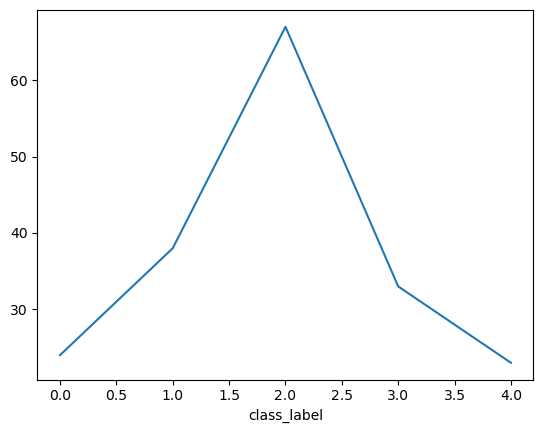

In [6]:
val_label_document_count = validation_data.groupby(['class_label']).size()
val_label_document_count.plot()
display(val_label_document_count)

Calculation of $π_y=y_k ≡ P (Y=y_k)$ and keeping it in **class_probabilities**

In [7]:
label_probabilities = label_document_count / label_document_count.sum()
display(label_probabilities) 
label_probabilities = np.log(label_probabilities)

class_label
0    0.139493
1    0.155797
2    0.358696
3    0.206522
4    0.139493
dtype: float64

Sum the words accross documents into **occurances_of_words**

In [8]:
occurances_of_words = training_data.groupby(['class_label']).sum()

# The line below is the fair dirichlet prior addition with alpha value of 1
if(dirichlet):
    occurances_of_words += 1

display(occurances_of_words)
label_word_count = occurances_of_words.sum(axis=1)
display(label_word_count)

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,kooyong,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren
class_label,,,,,,,,,,,,,,,,,,,,,
0,10,1,37,17,38,44,5,5,18,73,...,0,0,0,0,0,0,0,0,0,0
1,0,4,141,4,0,2,0,0,17,43,...,0,0,0,0,0,0,0,0,0,0
2,0,2,122,27,7,0,0,0,34,173,...,0,0,0,0,0,0,0,0,0,0
3,0,0,124,13,1,8,0,0,17,146,...,0,0,0,0,0,0,0,0,0,0
4,0,0,102,7,0,20,0,0,22,130,...,4,3,5,10,3,6,0,3,3,3


class_label
0    11572
1    17179
2    31533
3    20755
4    10819
dtype: int64

Calculating the $P(x_i|y_j)$ values

In [9]:
word_probabilities = occurances_of_words.div(label_word_count, axis='rows')
display(word_probabilities)
word_probabilities = np.log(word_probabilities)
word_probabilities = word_probabilities.replace(-np.inf, np.nan_to_num(-np.inf))
#word_probabilities = np.nan_to_num(word_probabilities)
#word_probabilities = pd.DataFrame(word_probabilities)
display(word_probabilities)

,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,kooyong,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren
class_label,,,,,,,,,,,,,,,,,,,,,
0,0.000864,0.000086,0.003197,0.001469,0.003284,0.003802,0.000432,0.000432,0.001555,0.006308,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000233,0.008208,0.000233,0.000000,0.000116,0.000000,0.000000,0.000990,0.002503,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000063,0.003869,0.000856,0.000222,0.000000,0.000000,0.000000,0.001078,0.005486,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.005974,0.000626,0.000048,0.000385,0.000000,0.000000,0.000819,0.007034,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.009428,0.000647,0.000000,0.001849,0.000000,0.000000,0.002033,0.012016,...,0.00037,0.000277,0.000462,0.000924,0.000277,0.000555,0.0,0.000277,0.000277,0.000277


/home/emre/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,claxton,hunt,first,major,medal,british,hurdler,sarah,confid,win,...,kooyong,massu,mcenro,mauresmo,ameli,hip,fiveset,mario,ancic,lundgren
class_label,,,,,,,,,,,,,,,,,,,,,
0,-7.053759e+00,-9.356344e+00,-5.745426,-6.523130,-5.718758e+00,-5.572154e+00,-7.746906e+00,-7.746906e+00,-6.465972,-5.065884,...,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308
1,-1.797693e+308,-8.365149e+00,-4.802683,-8.365149,-1.797693e+308,-9.058296e+00,-1.797693e+308,-1.797693e+308,-6.918230,-5.990243,...,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308
2,-1.797693e+308,-9.665643e+00,-5.554769,-7.062953,-8.412880e+00,-1.797693e+308,-1.797693e+308,-1.797693e+308,-6.832429,-5.205498,...,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308
3,-1.797693e+308,-1.797693e+308,-5.120261,-7.375593,-9.940542e+00,-7.861101e+00,-1.797693e+308,-1.797693e+308,-7.107329,-4.956936,...,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308,-1.797693e+308
4,-1.797693e+308,-1.797693e+308,-4.664086,-7.343149,-1.797693e+308,-6.293327e+00,-1.797693e+308,-1.797693e+308,-6.198017,-4.421525,...,-7.902765e+00,-8.190447e+00,-7.679621e+00,-6.986474e+00,-8.190447e+00,-7.497300e+00,-1.797693e+308,-8.190447e+00,-8.190447e+00,-8.190447e+00


### Predicting on the validation data
Each document in the validation (or test) dataset is fed into the predict_value function individually. Their results are appended to a numpy array called predictions.

In [10]:
validation_labels = pd.DataFrame(validation_data[["class_label"]], dtype='int32')
validation_row_count = validation_labels.count()['class_label'].astype(int)

predictions = np.array([])
for i in range(0, validation_row_count):
    row = validation_data.loc[i,:]
    row_prediction = predict_value(row)
    predictions = np.append(predictions, [int(row_prediction)])

/tmp/ipykernel_18500/1651131820.py:4: RuntimeWarning: overflow encountered in double_scalars
  max_result += argument[j] * word_probabilities.iloc[0][j]
/tmp/ipykernel_18500/1651131820.py:4: RuntimeWarning: overflow encountered in multiply
  max_result += argument[j] * word_probabilities.iloc[0][j]
/tmp/ipykernel_18500/1651131820.py:9: RuntimeWarning: overflow encountered in double_scalars
  result += argument[j] * word_probabilities.iloc[k][j]
/tmp/ipykernel_18500/1651131820.py:9: RuntimeWarning: overflow encountered in multiply
  result += argument[j] * word_probabilities.iloc[k][j]


KeyboardInterrupt: 

### Create confusion matrix
- First, a table of predicted values versus the actual values is created. This is assigned to the variable confusion_matrix.
- To obtain the confusion matrix with labels TP, TN, FP and FN, these values are calculated for each label, and then the summed to get the total TP, TN, FP and FN values. 
- The accuracy is then calculated using this table.

In [ ]:
# turn predictions array into dataframe
prediction_labels = pd.DataFrame(predictions, dtype='int32', columns=['predicted_label'])

# create the confusion matrix after concatinating validation labels and prediction labels into one dataframe
pred_results = pd.concat([validation_labels, prediction_labels], axis=1, ignore_index=True)
pred_results = pred_results.rename(columns={0: 'y_actual', 1: 'y_predicted'})
confusion_matrix = pd.crosstab(pred_results['y_actual'], pred_results['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
display(confusion_matrix)

confusion_data = np.full((label_count, 4), 0, dtype=int)
confusion_values = pd.DataFrame(confusion_data, columns=['TP', 'TN', 'FP', 'FN'])
for i in range(label_count):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for j in range(label_count):
        for k in range(label_count):
            if j == i and k == i:
                TP = confusion_matrix[j][k]
            elif j == i:
                FP += confusion_matrix[j][k]
            elif k == i:
                FN += confusion_matrix[j][k]
            else:
                TN += confusion_matrix[j][k]
    confusion_values['TP'][i] = TP
    confusion_values['TN'][i] = TN
    confusion_values['FP'][i] = FP
    confusion_values['FN'][i] = FN
display(confusion_values)

confusion_sum = confusion_values.sum()
TP = confusion_sum['TP']
TN = confusion_sum['TN']
FP = confusion_sum['FP']
FN = confusion_sum['FN']
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy: " + str(accuracy))